# Librerías
---

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Def. Funciones:

In [4]:
def f(x,t,omega):
    return -(omega**2)*x

def System(r,t,omega=2*np.pi):
    x,v = r
    dxdt = v
    dvdt = -omega**2*x
    return dxdt,dvdt

### Beeman:

In [5]:
def Beeman(f, cond, t, f_ang):
    h = t[1] - t[0]
    
    pos = np.zeros_like(t)
    vel = np.zeros_like(t)
    
    pos[0] = cond[0]
    vel[0] = cond[1]
    
    a_0 = f(pos[0], t[0], f_ang)
    velocidad_media = vel[0] + 0.5 * h * a_0
    pos[1] = pos[0] + h * velocidad_media
    a_media = f(pos[1], t, f_ang)
    vel[1] = velocidad_media + 0.5 * h * a_media
    
    pos_corregidas = pos.copy()
    vel_corregidas = vel.copy()
    

    for i in range(2, len(t)):
        # Calculamos la aceleración en el paso de tiempo act y el ant
        a_act = f(pos[i-1], t[i-1], f_ang)
        a_ant = f(pos[i-2], t[i-2], f_ang)
        
        pos[i] = pos[i-1] + h * vel[i-1] + ((h**2) / 6) * (4 * a_act - a_ant)
        
        # Realizamos una corrección futura
        pos_corregidas[i] = pos[i]
        pos_corregidas[i] = pos_corregidas[i-1] + h * vel_corregidas[i-1] + ((h**2) / 6) * (f(pos_corregidas[i], t[i], f_ang) + 2 * a_act)
        
        # Calculamos las nuevas vel
        vel_corregidas[i] = (pos_corregidas[i] / h) - (pos_corregidas[i-1] / h) + ((h) / 6) * (2 * f(pos_corregidas[i], t[i], f_ang) + a_act)
        
    return pos, vel, pos_corregidas, vel_corregidas

## Def. Variables:

In [6]:
omega = 2*np.pi
t = np.linspace(0,5,100)
x0 = np.array([1,0])

## Gráfica:
---

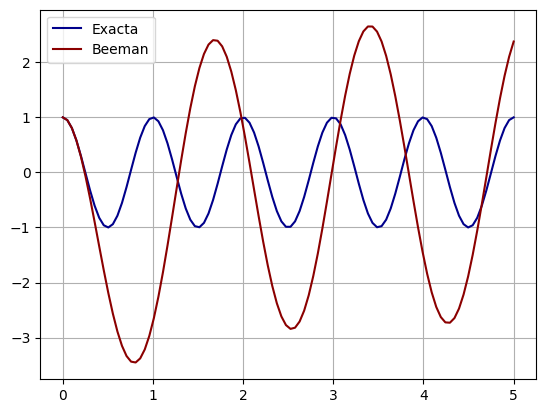

In [12]:
x,v,xc,vc= Beeman(f,x0,t,omega)
exact = odeint(System,x0,t,args=(omega,))

plt.plot(t,exact[:,0], label='Exacta', c="darkblue")
plt.plot(t,xc, label='Beeman', c="darkred")
plt.legend()
plt.grid()
plt.show()